台北市youbike api,請下載資料,將資料轉成DataFrame

youbike_url = 'https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json'

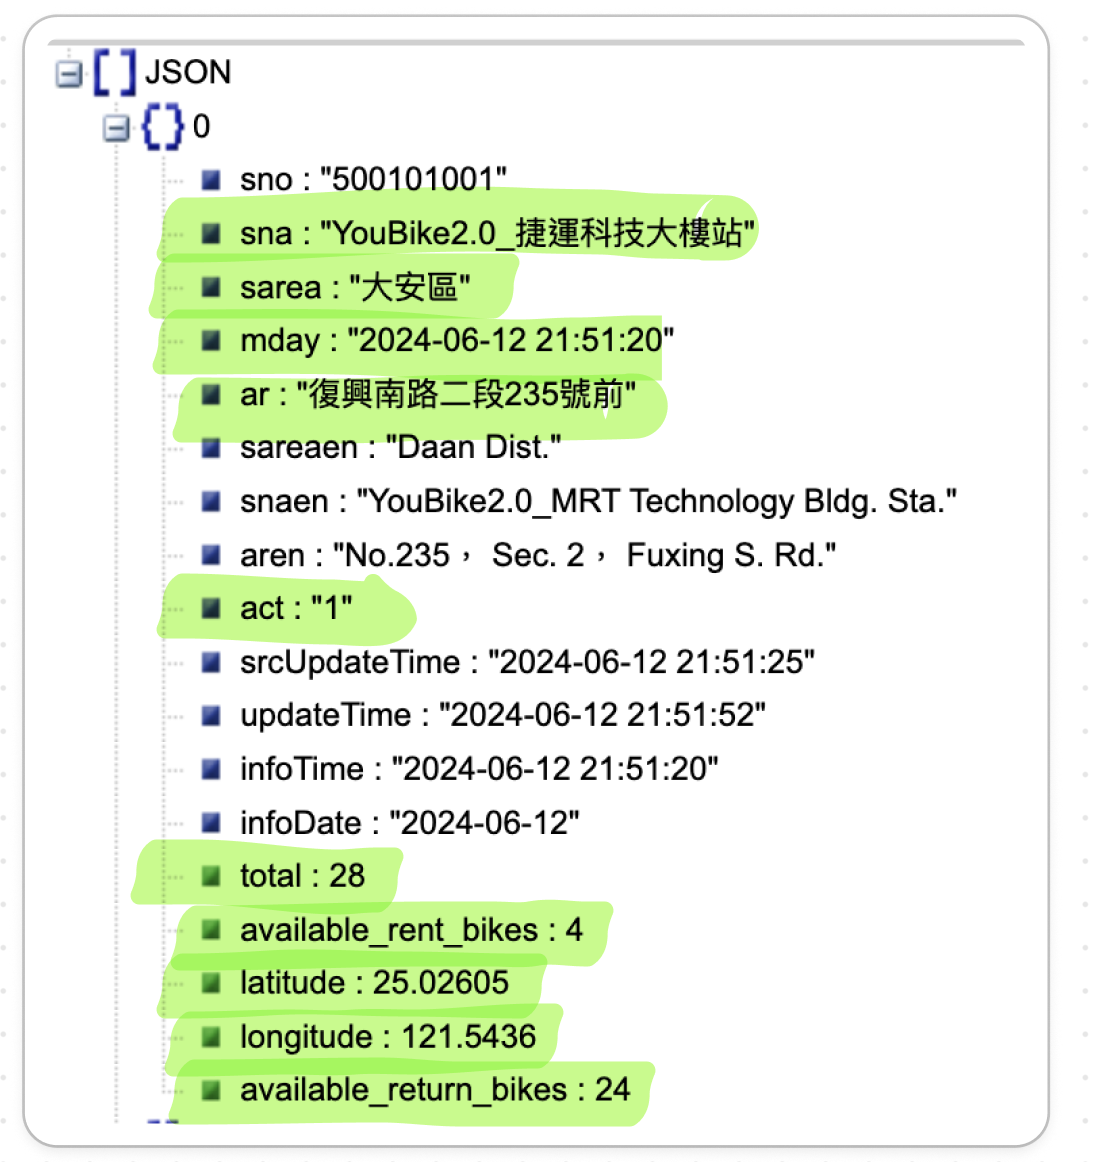

In [2]:
import requests
from requests import Response
youbike_url = 'https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json'

res:Response = requests.get(youbike_url)

if res.status_code == 200:
    print("下載成功")
else:
    print("下載失敗")


from pydantic import BaseModel,Field,field_validator,RootModel
class Site (BaseModel):
    站名:str = Field(alias='sna') 
    行政區域:str = Field(alias='sarea')
    時間:str = Field(alias='mday')
    位置:str = Field(alias='ar')
    狀態:bool = Field(alias='act')
    總數量:int = Field(alias='total')
    可借:int = Field(alias='available_rent_bikes')
    緯度:float = Field(alias='latitude')
    經度:float = Field(alias='longitude')     
    可還:int = Field(alias='available_return_bikes')

    @field_validator('站名',mode='before')
    @classmethod
    def get_name(cls,value:str) ->str:
         return value.split('_')[-1]   

class Youbick(RootModel):
    root:list[Site]


data = Youbick.model_validate_json(res.text)
all_sites = data.model_dump()


import pandas as pd
df = pd.DataFrame(all_sites)
df

下載成功


,站名,行政區域,時間,位置,狀態,總數量,可借,緯度,經度,可還
0,捷運科技大樓站,大安區,2025-06-21 17:11:16,復興南路二段235號前,True,28,28,25.02605,121.54360,0
1,復興南路二段273號前,大安區,2025-06-21 17:23:15,復興南路二段273號西側,True,21,21,25.02565,121.54357,0
2,國北教大實小東側門,大安區,2025-06-21 17:27:14,和平東路二段96巷7號,True,28,1,25.02429,121.54124,27
3,和平公園東側,大安區,2025-06-21 17:24:14,和平東路二段118巷33號,True,11,9,25.02351,121.54282,2
4,辛亥復興路口西北側,大安區,2025-06-21 17:00:03,復興南路二段368號,True,16,5,25.02153,121.54299,11
...,...,...,...,...,...,...,...,...,...,...
1603,臺大禮賢樓西側,臺大公館校區,2025-06-21 16:50:17,臺大禮賢樓西側空地,True,36,34,25.01467,121.53765,2
1604,臺大大一女餐廳廣場,臺大公館校區,2025-06-21 16:50:03,臺大大一女餐廳廣場後方,True,40,20,25.01479,121.53494,7
1605,臺大學新館,臺大公館校區,2025-06-21 15:33:17,臺大學新館旁,True,33,29,25.01944,121.54339,4
1606,臺大水源舍區C棟,臺大公館校區,2025-06-21 16:20:03,臺大水源舍區C棟西側,True,99,58,25.01547,121.52892,41


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   站名      1608 non-null   object 
 1   行政區域    1608 non-null   object 
 2   時間      1608 non-null   object 
 3   位置      1608 non-null   object 
 4   狀態      1608 non-null   bool   
 5   總數量     1608 non-null   int64  
 6   可借      1608 non-null   int64  
 7   緯度      1608 non-null   float64
 8   經度      1608 non-null   float64
 9   可還      1608 non-null   int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 114.8+ KB


In [4]:
import numpy as np

less3_df = df.query('可借<=3')
less3_df.shape

(403, 10)